In [67]:
# Importing modules
import numpy as np
from matplotlib import pyplot as plt
import os
import datetime
import timeit
import time
import pickle
from statistics import mean 
from os.path import dirname as up
print("ok")

# setting path to data
repo_path = os.getcwd()

# functions to use:
def get_pickle_path(repo_path):
    two_up_path = up(up(repo_path))
    python_file_path = os.path.join(two_up_path, "Python")
    pickle_path = os.path.join(python_file_path, "Pickle_data") 
    return pickle_path

def round_done(repo_path):
    os.chdir(repo_path)
    print("done")

def plotting_saving(t,x,start_time,plt_num):
    add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
    print(add_the_time)
    plt.title(datetime.datetime.fromtimestamp(start_time).strftime('plt'+plt_num+' - ch?, bad documentation : %Y-%m-%d, at %H:%M:%S'))
    plt.xlabel('time [min]')
    plt.ylabel('[Volt]]')
    plt.scatter(t, x,s = 1)
    save_name = "fig_"+add_the_time+"_plt"+plt_num+"_min"
    plt.savefig(save_name ,bbox_inches='tight')
    plt.show()
    
def plotting_saving_ch(t,x,start_time,ch_num,ch_name):
    # change to saving-directory
    save_to_path = os.path.join(repo_path, "figs")
    os.chdir(save_to_path)
    #
    add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
    print(add_the_time)
    plt.title(datetime.datetime.fromtimestamp(start_time).strftime(ch_num+', '+ch_name+ ': %Y-%m-%d, at %H:%M:%S'))
    plt.xlabel('time [min]')
    plt.ylabel('[Volt]]')
    plt.scatter(t, x,s = 1)
    save_name = "fig_"+add_the_time+"_"+ch_num+"_min"
    plt.savefig(save_name ,bbox_inches='tight')
    plt.show()
        

def get_from_pickle_and_save(file_name,ch1_plot_title='ch1', ch3_plot_title='ch3',ch4_plot_title='ch4'):
    # get data

    f = open(file_name,'rb')
    scope_data = pickle.load(f)
    # print(scope_data)
#     print(len(scope_data))
    start_time = scope_data[2]


    ch1_data = []
    ch1_time = []
    ch4_data = []
    ch4_time = []
    ch3_data = []
    ch3_time = []
#     print(start_time)
    add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
    print(add_the_time)

    with open(file_name, 'rb') as handle:
            try:
                while True:
                    temp_array = pickle.load(handle)
#                     print(len(temp_array))
    #                 print(temp_array[0])

                    data_time = temp_array[2]
                    time_diff = (data_time - start_time)/60
                    new_ch1_data = temp_array[3]
                    time_vec = temp_array[4]


                    ch1_t =[t+time_diff for t in time_vec] # [(data_time+t-start_time)/60 for t in time_vec]
                    ch1_data = ch1_data + new_ch1_data
                    ch1_time = ch1_time + ch1_t

                    new_ch3_data = temp_array[5]
                    ch3_time_vec = temp_array[6]
                    ch3_t =[t+time_diff for t in ch3_time_vec] # [data_time+t-start_time for t in ch3_time_vec]
                    ch3_data = ch3_data + new_ch3_data
                    ch3_time = ch3_time + ch3_t

                    new_ch4_data = temp_array[7]
                    ch4_time_vec = temp_array[8]
                    ch4_t =[t+time_diff for t in ch4_time_vec] # [data_time+t-start_time for t in ch4_time_vec]
                    ch4_data = ch4_data + new_ch4_data
                    ch4_time = ch4_time + ch4_t

            except EOFError:
                pass


    t = ch1_time
    x = ch1_data
    ch_num = ch1_plot_title
    ch_name = "amplified signal"
    plotting_saving_ch(t,x,start_time,ch_num,ch_name)   

    t = ch4_time
    x = ch4_data
    ch_num = ch4_plot_title        
    ch_name = "non-amp-signal"
    plotting_saving_ch(t,x,start_time,ch_num,ch_name)  

    t = ch3_time
    x = ch3_data
    ch_num = ch3_plot_title      
    ch_name = "sum"
    plotting_saving_ch(t,x,start_time,ch_num,ch_name)  
# ##################################################################################

# save_to_path = os.path.join(repo_path, "figs")
# os.chdir(save_to_path)

print("done")
# go back to original directory
os.chdir(repo_path)
# print( os.getcwd())

ok
done


I'd like to go through all the files in my current data folder.
plot them out - and save to an image.
the figure will have a flie name with a format:
fig_2020_09_01.png
saved to the original directory in the figs folder.

- go_to_pickle_data(repo_path)
- get data
- print out the data
- go back to fig_path
- save
- go back to the original directory.

In [61]:
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

saved_files = os.listdir()
# print("files in directory:\n",saved_files)
list_of_files_yet_to_open = saved_files.copy()
round_done(repo_path)

done


In [9]:
# get correct path


In [17]:
# 20200916_1827

list_of_files_yet_to_open = saved_files.copy()
time_stamps = []

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data__20200916_1827.pickle'
list_of_files_yet_to_open.remove(file_name)
list_of_files_yet_to_open.remove('data__20200916_1827 - Copy.pickle')
list_of_files_yet_to_open.remove('data__20200916_1827_Copy.pickle')

f = open(file_name,'rb')
scope_data = pickle.load(f)
print(scope_data[0])

start_time = scope_data[1]

# get time stamps, this takes a while.
with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
                #scope_data.append(pickle.load(handle))
                time_stamps.append(temp_array[1])
        except EOFError:
            pass
        
print("timestamps data retrieved")
print("this run was "+str(10*len(time_stamps))+ "minutes long")

# print("all the time stamps:")
# for x in range(len(time_stamps)):
#     print(x," Started at :", datetime.datetime.fromtimestamp(time_stamps[x]).strftime('%Y-%m-%d %H:%M:%S'))  

round_done(repo_path)

str_of_vars,t_stamp,ch1_data,ch1_time,ch3_data,ch3_time,ch4_data,ch4_time,ch1_data_again,ch1_time_again
timestamps data retrieved
this run was 850minutes long
done


In [4]:
# 20200916_1827

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get avg data from ch1 [Amplified x axis]
ch1_data = []
ch1_time = []
with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
                #scope_data.append(pickle.load(handle))
                ch1_data.append(mean( temp_array[2])) 
                #temp_time = temp_array[3]
                #time_diff = temp_array[1]/60 - start_time
                #temp_time = [x+time_diff for x in temp_time] 
                ch1_time.append(temp_array[1]) 
                
        except EOFError:
            pass
print("done, got data for ch1")
ch1_time_min= [(x - start_time)/60 for x in ch1_time]  


round_done(repo_path)

KeyboardInterrupt: 

In [ ]:
# 20200916_1827 - saving images
save_to_path = os.path.join(repo_path, "figs")
os.chdir(save_to_path)

add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
print(add_the_time)

plt.title(datetime.datetime.fromtimestamp(time_stamps[0]).strftime('x amplified : %Y-%m-%d, at %H:%M:%S'))
plt.xlabel('time [min]')
plt.ylabel('[Volt]]')

plt.scatter(ch1_time_min, ch1_data,s = 1)
save_name = "fig_"+add_the_time+"_ch1_min"
plt.savefig(save_name ,bbox_inches='tight')
plt.show()

ch1_time_h= [x/60 for x in ch1_time_min]  

plt.title(datetime.datetime.fromtimestamp(time_stamps[0]).strftime('x amplified : %Y-%m-%d, at %H:%M:%S'))
plt.xlabel('time [hours]') 
plt.ylabel('[Volt]]')

plt.scatter(ch1_time_h, ch1_data,s = 1)
save_name = "fig_"+add_the_time+"_ch1_hours"
plt.savefig(save_name ,bbox_inches='tight')
plt.show()


round_done(repo_path)

In [ ]:
# 20200916_1827 
# get avg data from ch3 [sum]

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

ch3_data = []
ch3_time = []
ch4_data = []
with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
                #scope_data.append(pickle.load(handle))
                ch3_data.append(mean( temp_array[4])) 
                ch4_data.append(mean( temp_array[6]))
                #temp_time = temp_array[3]
                #time_diff = temp_array[1]/60 - start_time
                #temp_time = [x+time_diff for x in temp_time] 
                ch3_time.append(temp_array[1]) 
                
        except EOFError:
            pass
print("done, got data for ch3 and ch4")

# set path to save.
save_to_path = os.path.join(repo_path, "figs")
os.chdir(save_to_path)

ch3_time_min= [(x - start_time)/60 for x in ch1_time]  

plt.title(datetime.datetime.fromtimestamp(time_stamps[0]).strftime('sum: %Y-%m-%d, at %H:%M:%S'))
plt.xlabel('time [min]')
plt.ylabel('[Volt]]')

plt.scatter(ch3_time_min, ch3_data,s = 1)
save_name = "fig_"+add_the_time+"_ch3_min"
plt.savefig(save_name ,bbox_inches='tight')
plt.show()


ch3_time_h= [x/60+18.45 for x in ch1_time_min]  
#or i in range(len(ch3_time_h)):
    # ch3_time_h[i]>=24:
        #h3_time_h[i] = ch3_time_h[i] - 24
    

plt.title(datetime.datetime.fromtimestamp(time_stamps[0]).strftime('sum: %Y-%m-%d, at %H:%M:%S')) 
plt.xlabel('time [hour]') 
plt.ylabel('[Volt]]')

plt.scatter(ch3_time_h, ch3_data,s = 1)
save_name = "fig_"+add_the_time+"_ch3_hours"
plt.savefig(save_name ,bbox_inches='tight')
plt.show()


plt.title(datetime.datetime.fromtimestamp(time_stamps[0]).strftime('x, ch4: %Y-%m-%d, at %H:%M:%S'))
plt.xlabel('time [min]')
plt.ylabel('[Volt]]')

plt.scatter(ch3_time_min, ch4_data,s = 1)
save_name = "fig_"+add_the_time+"_ch4_min"
plt.savefig(save_name ,bbox_inches='tight')
plt.show()

plt.title(datetime.datetime.fromtimestamp(time_stamps[0]).strftime('x, ch4: %Y-%m-%d, at %H:%M:%S')) 
plt.xlabel('time [hour]') 
plt.ylabel('[Volt]]')

plt.scatter(ch3_time_h, ch4_data,s = 1)
save_name = "fig_"+add_the_time+"_ch4_hours"
plt.savefig(save_name ,bbox_inches='tight')
plt.show()

round_done(repo_path)

start time:  1600159294.4108856
4
20200915_1141


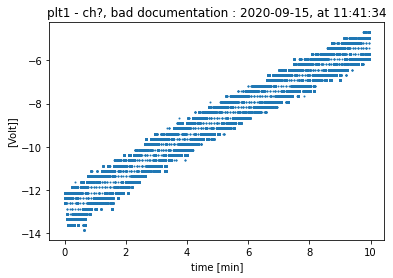

20200915_1141


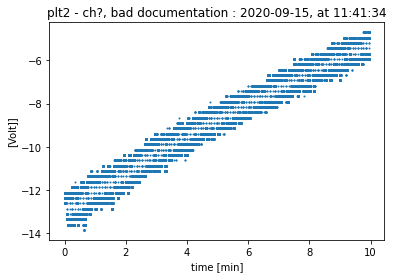

start time:  1600159920.1714888
4
20200915_1152


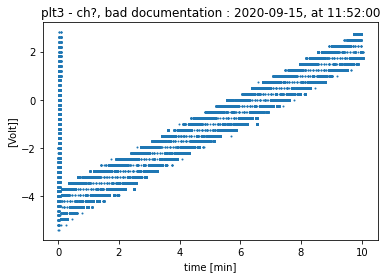

20200915_1152


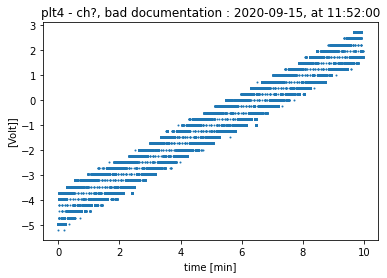

done


In [5]:
# 20200915_1141

def plotting_saving(t,x,start_time,plt_num):
    add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
    print(add_the_time)
    plt.title(datetime.datetime.fromtimestamp(start_time).strftime('plt'+plt_num+' - ch?, bad documentation : %Y-%m-%d, at %H:%M:%S'))
    plt.xlabel('time [min]')
    plt.ylabel('[Volt]]')
    plt.scatter(t, x,s = 1)
    save_name = "fig_"+add_the_time+"_plt"+plt_num+"_min"
    plt.savefig(save_name ,bbox_inches='tight')
    plt.show()
    
# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data_200915__1140.pickle'
list_of_files_yet_to_open.remove(file_name)

# check if there's anything elso in the pickle
n = 0
with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
                print("start time: ", temp_array[0][0])
                print(len(temp_array))
                start_time = temp_array[0][0]
                t1 = temp_array[0][1:]
                x1 = temp_array[1]
                t2 = temp_array[2][1:]
                x2 = temp_array[3]
                # change to saving-directory
                save_to_path = os.path.join(repo_path, "figs")
                os.chdir(save_to_path)
                plt_num = str(n+1)
                plotting_saving(t1,x1,start_time,plt_num)
                plt_num = str(n+2)
                plotting_saving(t2,x2,start_time,plt_num)
                n = n+2
                # set path to get data
                pickle_path = get_pickle_path(repo_path)
                os.chdir(pickle_path)
        except EOFError:
            pass
        
round_done(repo_path)

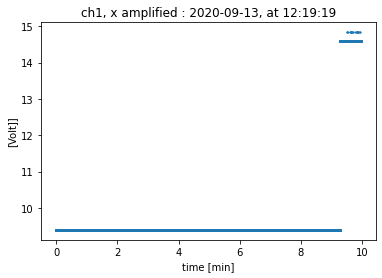

done


In [6]:
# 20200913_1219

time_stamps = []

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data_130920n1219.pickle'
# list_of_files_yet_to_open.remove(file_name)
f = open(file_name,'rb')
scope_data = pickle.load(f)
# print(scope_data[1])
# print(len(scope_data))
x = scope_data[1]
t = scope_data[0][1:]
start_time = scope_data[0][0]
# print(len(x),len(t))

# change to saving-directory
save_to_path = os.path.join(repo_path, "figs")
os.chdir(save_to_path)

add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
# print(add_the_time)

plt.title(datetime.datetime.fromtimestamp(start_time).strftime('ch1, x amplified : %Y-%m-%d, at %H:%M:%S'))
plt.xlabel('time [min]')
plt.ylabel('[Volt]]')
plt.scatter(t, x,s = 1)
save_name = "fig_"+add_the_time+"_ch1_min"
plt.savefig(save_name ,bbox_inches='tight')
plt.show()

round_done(repo_path)

2
20200913_1601


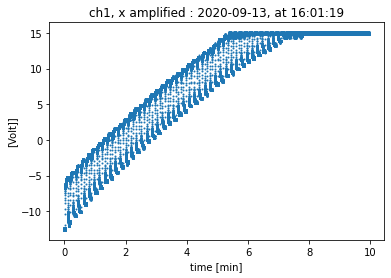

done


In [7]:
# 20200913_1601
time_stamps = []

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data_200913n1600.pickle'
# list_of_files_yet_to_open.remove(file_name)
f = open(file_name,'rb')
scope_data = pickle.load(f)
# print(scope_data)
print(len(scope_data))

x = scope_data[1]
t = scope_data[0][1:]
start_time = scope_data[0][0]

# change to saving-directory
save_to_path = os.path.join(repo_path, "figs")
os.chdir(save_to_path)

add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
print(add_the_time)
plt.title(datetime.datetime.fromtimestamp(start_time).strftime('ch1, x amplified : %Y-%m-%d, at %H:%M:%S'))
plt.xlabel('time [min]')
plt.ylabel('[Volt]]')
plt.scatter(t, x,s = 1)
save_name = "fig_"+add_the_time+"_ch1_min"
plt.savefig(save_name ,bbox_inches='tight')
plt.show()
round_done(repo_path)

4
start time:  1600178584.81615
4
20200915_1703


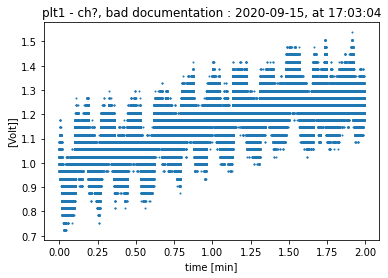

20200915_1703


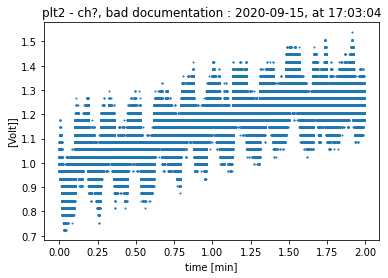

start time:  1600179207.7327304
4
20200915_1713


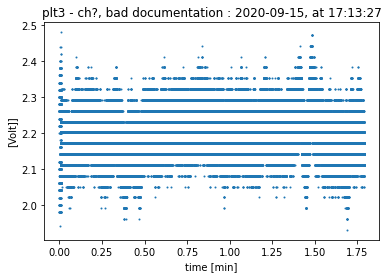

20200915_1713


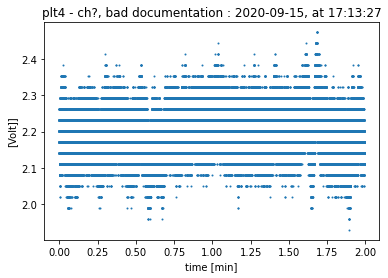

done


In [8]:
# 20200915_1703  , 20200915_1713
time_stamps = []

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data_200915__1700.pickle'
# list_of_files_yet_to_open.remove(file_name)
f = open(file_name,'rb')
scope_data = pickle.load(f)
# print(scope_data)
print(len(scope_data))

# with open(file_name, 'rb') as handle:
#         try:
#             while True:
#                 temp_array = pickle.load(handle)
#                 print(len(temp_array))
                
#         except EOFError:
#             pass
        
n = 0
with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
                print("start time: ", temp_array[0][0])
                print(len(temp_array))
                start_time = temp_array[0][0]
                t1 = temp_array[0][1:]
                x1 = temp_array[1]
                t2 = temp_array[2][1:]
                x2 = temp_array[3]
                # change to saving-directory
                save_to_path = os.path.join(repo_path, "figs")
                os.chdir(save_to_path)
                plt_num = str(n+1)
                plotting_saving(t1,x1,start_time,plt_num)
                plt_num = str(n+2)
                plotting_saving(t2,x2,start_time,plt_num)
                n = n+2
                # set path to get data
                pickle_path = get_pickle_path(repo_path)
                os.chdir(pickle_path)
        except EOFError:
            pass
        
round_done(repo_path)

2
20200913_1601


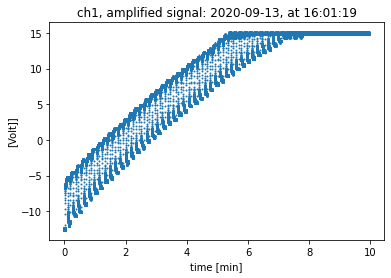

4
20200913_1620


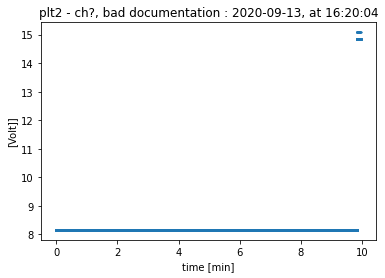

20200913_1620


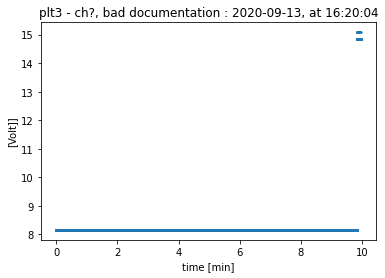

done


In [7]:
# 20200913_1601
time_stamps = []

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data_200913n1600.pickle'
# list_of_files_yet_to_open.remove(file_name)
f = open(file_name,'rb')
scope_data = pickle.load(f)
# print(scope_data)
# print(len(scope_data))

def plotting_saving_ch(t,x,start_time,ch_num,ch_name):
    # change to saving-directory
    save_to_path = os.path.join(repo_path, "figs")
    os.chdir(save_to_path)
    #
    add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
    print(add_the_time)
    plt.title(datetime.datetime.fromtimestamp(start_time).strftime(ch_num+', '+ch_name+ ': %Y-%m-%d, at %H:%M:%S'))
    plt.xlabel('time [min]')
    plt.ylabel('[Volt]]')
    plt.scatter(t, x,s = 1)
    save_name = "fig_"+add_the_time+"_"+ch_num+"_min"
    plt.savefig(save_name ,bbox_inches='tight')
    plt.show()

n = 0
with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
                print(len(temp_array))
                if len(temp_array) == 2:
                    start_time = temp_array[0][0]
                    t = temp_array[0][1:]
                    x = temp_array[1]
                    plt_num = n
                    ch_num = 'ch1'
                    ch_name ='amplified signal'
                    plotting_saving_ch(t,x,start_time,ch_num,ch_name)
                    n=n+1
                    # set path to get data
                    pickle_path = get_pickle_path(repo_path)
                    os.chdir(pickle_path)
                else:
                    start_time = temp_array[0][0]
                    t1 = temp_array[0][1:]
                    x1 = temp_array[1]
                    t2 = temp_array[2][1:]
                    x2 = temp_array[3]
                    # change to saving-directory
                    save_to_path = os.path.join(repo_path, "figs")
                    os.chdir(save_to_path)
                    plt_num = str(n+1)
                    plotting_saving(t1,x1,start_time,plt_num)
                    plt_num = str(n+2)
                    plotting_saving(t2,x2,start_time,plt_num)
                    n = n+2
                    # set path to get data
                    pickle_path = get_pickle_path(repo_path)
                    os.chdir(pickle_path)
        except EOFError:
            pass
        
round_done(repo_path)

160662 15.08319


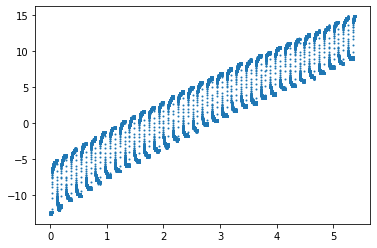

In [8]:
def plotting_saving_ch(t,x,start_time,ch_num,ch_name):
    # change to saving-directory
    save_to_path = os.path.join(repo_path, "figs")
    os.chdir(save_to_path)
    #
    add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
    print(add_the_time)
    plt.title(datetime.datetime.fromtimestamp(start_time).strftime(ch_num+', '+ch_name+ ': %Y-%m-%d, at %H:%M:%S'))
    plt.xlabel('time [min]')
    plt.ylabel('[Volt]]')
    plt.scatter(t, x,s = 1)
    save_name = "fig_"+add_the_time+"_"+ch_num+"_min"
    plt.savefig(save_name ,bbox_inches='tight')
    plt.show()

# plt.scatter(t, x,s = 1)
# plt.show()
idx = x.index(max(x))
print(x.index(max(x)),max(x))
plt.scatter(t[:idx], x[:idx],s = 1)
plt.show()


In [ ]:
%matplotlib inline
# %matplotlib
import numpy as np
from scipy.fft import fft

t_vec = t[:idx]
t_vec_s = ([var*60 for var in t_vec]) #t vec in [seconds]
data_vec = x[:idx]

N = len(data_vec)
# N = Number of points

# sample spacing
dt = np.diff(t_vec_s)[0]
sample_rate = 1/dt

F_data = fft(data_vec)
F_frequency = np.linspace(0.0, 1.0/(2.0*dt), N//2)
print(t_vec[-1],t_vec_s[-1])

plt.plot(F_frequency, 2.0/N * np.abs(F_data[0:N//2]))
plt.grid()
plt.show()

def draw_fft(t_sec,x):
    N = len(x)
    dt = np.diff(t_sec)[2] #change this to an avg or mean at a later time.
    F_data = fft(x)
    F_frequency = np.linspace(0.0, 1.0/(2.0*dt), N//2)
    plt.plot(F_frequency, 2.0/N * np.abs(F_data[0:N//2]))
    plt.grid()
    plt.show()

In [ ]:
fx = F_frequency
fy = 2.0/N * np.abs(F_data[0:N//2])
here = 500
fx = fx[:here] 
fy = fy[:here]
plt.plot(fx,fy)
plt.grid()
plt.show()

In [ ]:
draw_fft(t_vec_s,data_vec)


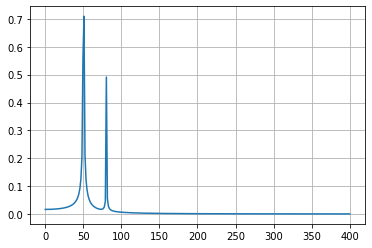

In [17]:
%matplotlib inline
from scipy.fft import fft

# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
20200915_2322


KeyboardInterrupt: 

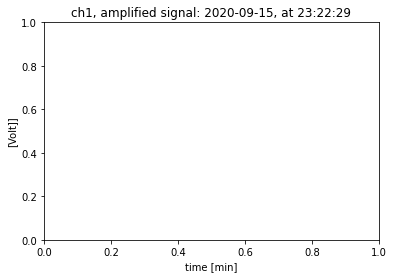

In [10]:
# 20200915_2322

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data_200915__2300.pickle'
# list_of_files_yet_to_open.remove(file_name)
f = open(file_name,'rb')
scope_data = pickle.load(f)
# print(scope_data)
# print(len(scope_data))
start_time = scope_data[0][0]
ch1_data = []
ch4_data = []
ch1_time = []
ch4_time = []
    
with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
                print(len(temp_array))
                data_time = temp_array[0][0]
                time_vec = temp_array[0][1:]
                new_ch1_data = temp_array[1]
                
                ch1_t = [data_time+t-start_time for t in time_vec]
                ch1_data = ch1_data + new_ch1_data
                ch1_time = ch1_time + ch1_t

                ch4_time_vec = temp_array[2][1:]
                new_ch4_data = temp_array[3]
                ch4_t = [data_time+t-start_time for t in ch4_time_vec]
                ch4_data = ch4_data + new_ch4_data
                ch4_time = ch4_time + ch4_t
                
                
#                 print(len(ch1_data))
#                 print(len(temp_array))

#                 print(len(temp_array),datetime.datetime.fromtimestamp(start_time).strftime(': %Y-%m-%d, at %H:%M:%S'))
        except EOFError:
            pass
        
# t = ch1_time
t = [time/60 for time in ch1_time]
x = ch1_data
ch_num = "ch1"        
ch_name = "amplified signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)        

t = ch4_time
x = ch4_data
ch_num = "ch1_again"        
ch_name = "amplified signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  

round_done(repo_path)

In [ ]:
# 20200916_1259

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data_200916__1248.pickle'
# list_of_files_yet_to_open.remove(file_name)
f = open(file_name,'rb')
scope_data = pickle.load(f)
# print(scope_data)
# print(len(scope_data))
start_time = scope_data[2][0]
ch1_data = []
ch4_data = []
ch1_time = []
ch4_time = []
ch3_data = []
ch3_time = []

# add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
# print(add_the_time)

with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
#                 print(len(temp_array))
#                 print(temp_array[0])
                
                data_time = temp_array[2][0]
                time_diff = (data_time - start_time)/60
        
                time_vec = temp_array[2][1:]
                new_ch1_data = temp_array[1]
                
                ch1_t = [t+time_diff for t in time_vec]
                ch1_data = ch1_data + new_ch1_data
                ch1_time = ch1_time + ch1_t
                
                new_ch3_data = temp_array[5]
                ch3_time_vec = temp_array[6][1]
                ch3_t = [t+time_diff for t in ch3_time_vec]
                ch3_data = ch3_data + new_ch3_data
                ch3_time = ch3_time + ch3_t

                ch4_time_vec = temp_array[8][1]
                new_ch4_data = temp_array[7]
                ch4_t = [t+time_diff for t in ch4_time_vec]
                ch4_data = ch4_data + new_ch4_data
                ch4_time = ch4_time + ch4_t

        except EOFError:
            pass
t = ch1_time
x = ch1_data
ch_num = "ch1"        
ch_name = "amplified signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)   

t = ch4_time
x = ch4_data
ch_num = "ch4"        
ch_name = "non-amp-signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  

t = ch3_time
x = ch3_data
ch_num = "ch3"        
ch_name = "sum"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  

round_done(repo_path)

In [ ]:
# 20200923_0905

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data_20200923_0905.pickle'
# list_of_files_yet_to_open.remove(file_name)
f = open(file_name,'rb')
scope_data = pickle.load(f)
start_time = scope_data[2]

ch1_data = []
ch4_data = []
ch1_time = []
ch4_time = []
ch3_data = []
ch3_time = []

with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
                print(len(temp_array))
#                 print(temp_array[0])
                
                data_time = temp_array[2]
                time_diff = (data_time - start_time)/60
                time_vec = temp_array[6]
                new_ch1_data = temp_array[3]
                
                ch1_t =[t+time_diff for t in time_vec]# [data_time+t-start_time for t in time_vec]
                ch1_data = ch1_data + new_ch1_data
                ch1_time = ch1_time + ch1_t
                
                new_ch3_data = temp_array[5]
                ch3_time_vec = temp_array[6]
                ch3_t =[t+time_diff for t in ch3_time_vec]# [data_time+t-start_time for t in ch3_time_vec]
                ch3_data = ch3_data + new_ch3_data
                ch3_time = ch3_time + ch3_t

                ch4_time_vec = temp_array[8]
                new_ch4_data = temp_array[7]
                ch4_t =[t+time_diff for t in ch4_time_vec]# [data_time+t-start_time for t in ch4_time_vec]
                ch4_data = ch4_data + new_ch4_data
                ch4_time = ch4_time + ch4_t

        except EOFError:
            pass
t = ch1_time
x = ch1_data
ch_num = "ch1"        
ch_name = "amplified signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)   
        
t = ch4_time
x = ch4_data
ch_num = "ch4"        
ch_name = "non-amp-signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  

t = ch3_time
x = ch3_data
ch_num = "ch3"        
ch_name = "sum"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  

round_done(repo_path)

In [ ]:
# 20200924_1510

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data_20200924_1510.pickle'
# list_of_files_yet_to_open.remove(file_name)
f = open(file_name,'rb')
scope_data = pickle.load(f)
start_time = scope_data[2]

ch1_data = []
ch4_data = []
ch1_time = []
ch4_time = []
ch3_data = []
ch3_time = []

# add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
# print(add_the_time)
with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
                print(len(temp_array))
#                 print(temp_array[0])
                
                data_time = temp_array[2]
                time_diff = (data_time - start_time)/60
#                 time_vec = temp_array[4] # there was a problem saving data for t in original acquisition code.
#                 new_ch1_data = temp_array[3]
                
#                 ch1_t =[t+time_diff for t in time_vec]# [data_time+t-start_time for t in time_vec]
#                 ch1_data = ch1_data + new_ch1_data
#                 ch1_time = ch1_time + ch1_t
                
                new_ch3_data = temp_array[5]
                ch3_time_vec = temp_array[6]
                ch3_t =[t+time_diff for t in ch3_time_vec]# [data_time+t-start_time for t in ch3_time_vec]
                ch3_data = ch3_data + new_ch3_data
                ch3_time = ch3_time + ch3_t

                ch4_time_vec = temp_array[8]
                new_ch4_data = temp_array[7]
                ch4_t =[t+time_diff for t in ch4_time_vec]# [data_time+t-start_time for t in ch4_time_vec]
                ch4_data = ch4_data + new_ch4_data
                ch4_time = ch4_time + ch4_t

        except EOFError:
            pass
# t = ch1_time
# x = ch1_data
# ch_num = "ch1"        
# ch_name = "amplified signal"
# plotting_saving_ch(t,x,start_time,ch_num,ch_name)   
        
t = ch4_time
x = ch4_data
ch_num = "ch4"        
ch_name = "non-amp-signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  

t = ch3_time
x = ch3_data
ch_num = "ch3"        
ch_name = "sum"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  

# print(scope_data[1])
# print(scope_data[2])
# print(len(scope_data[3]),len(scope_data[6]))
# print("\n")
# print('ch1_data',len(scope_data[3])," - ",scope_data[3][1:10])
# print('ch1_time',len(scope_data[4])," - ",scope_data[4])
# print('\nch3_data',len(scope_data[5])," - ",scope_data[5][1:10])
# print('ch3_time',len(scope_data[6])," - ",scope_data[6][1:10])
# print('\nch4_data',len(scope_data[7])," - ",scope_data[7][1:10])
# print('ch4_time',len(scope_data[8])," - ",scope_data[8][1:10])
# print('\nch1_data',scope_data[9][1:10])
# print('ch1_time',scope_data[10][1:10])

round_done(repo_path)

In [ ]:
# 20200909_1914

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data_dump_090920n1914.pickle'
# list_of_files_yet_to_open.remove(file_name)
f = open(file_name,'rb')
scope_data = pickle.load(f)
# print(scope_data)
# print(len(scope_data))


# add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
# print(add_the_time)
start_time = scope_data[0][0]
x = [] #[1]
t = [] # scope_data[0][1:]
with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
                print(len(temp_array))
                data_time =  temp_array[0][0]
                time_diff = (data_time - start_time)/60
                new_x = temp_array[1]
                new_t = temp_array[0][1:]
                ch1_t = [t+time_diff for t in new_t]# [data_time+t-start_time for t in new_t]
                t = t+ ch1_t 
                x = x+ new_x 
        except EOFError:
            pass
        
# t = ch1_time
# x = ch1_data
# t = [time/60 for time in t]
ch_num = "ch1"        
ch_name = "amplified signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  



# ch_num = 'ch1'
# ch_name ='amplified signal'
# plotting_saving_ch(t,x,start_time,ch_num,ch_name)
# n=n+1
# # set path to get data
# pickle_path = get_pickle_path(repo_path)
# os.chdir(pickle_path)        


round_done(repo_path)

In [ ]:
# 20200916_1755

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data__20200916_1754.pickle'
# list_of_files_yet_to_open.remove(file_name)
f = open(file_name,'rb')
scope_data = pickle.load(f)
# print(scope_data)
# print(len(scope_data))
start_time = scope_data[1]

ch1_data = []
ch1_time = []
ch4_data = []
ch4_time = []
ch3_data = []
ch3_time = []

# add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
# print(add_the_time)


with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
                print(len(temp_array))
                data_time = temp_array[1]
                time_diff = (data_time - start_time)/60
                new_ch1_data = temp_array[2]
                time_vec = temp_array[3]
                
                ch1_t = [t+time_diff for t in time_vec]#[data_time+t-start_time for t in time_vec]
                ch1_data = ch1_data + new_ch1_data
                ch1_time = ch1_time + ch1_t
                
                new_ch3_data = temp_array[4]
                ch3_time_vec = temp_array[5]
                ch3_t =[t+time_diff for t in ch3_time_vec]# [data_time+t-start_time for t in ch3_time_vec]
                ch3_data = ch3_data + new_ch3_data
                ch3_time = ch3_time + ch3_t

                ch4_time_vec = temp_array[6]
                new_ch4_data = temp_array[7]
                ch4_t = [t+time_diff for t in ch4_time_vec]#[data_time+t-start_time for t in ch4_time_vec]
                ch4_data = ch4_data + new_ch4_data
                ch4_time = ch4_time + ch4_t
        except EOFError:
            pass

        
t = ch1_time
# t = [time/60 for time in ch1_time]
x = ch1_data
ch_num = "ch1"        
ch_name = "amplified signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)   
        
t = ch4_time
# t = [time/60 for time in ch4_time]
x = ch4_data
ch_num = "ch4"        
ch_name = "non-amp-signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  

t = ch3_time
# t = [time/60 for time in ch3_time]
x = ch3_data
ch_num = "ch3"        
ch_name = "sum"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  

round_done(repo_path)

In [ ]:
# 20200917_1418

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data__20200917_1418.pickle'
# list_of_files_yet_to_open.remove(file_name)
f = open(file_name,'rb')
scope_data = pickle.load(f)
start_time = scope_data[2]

# add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
# print(add_the_time)

ch1_data = []
ch1_time = []
ch4_data = []
ch4_time = []
ch3_data = []
ch3_time = []


with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
                print(len(temp_array))
                

                data_time = temp_array[2]
                time_diff = (data_time - start_time)/60
                time_vec = temp_array[6]
                new_ch1_data = temp_array[3]
                
                ch1_t =[t+time_diff for t in time_vec]# [data_time+t-start_time for t in time_vec]
                ch1_data = ch1_data + new_ch1_data
                ch1_time = ch1_time + ch1_t
                
                new_ch3_data = temp_array[5]
                ch3_time_vec = temp_array[6]
                ch3_t =[t+time_diff for t in ch3_time_vec]# [data_time+t-start_time for t in ch3_time_vec]
                ch3_data = ch3_data + new_ch3_data
                ch3_time = ch3_time + ch3_t

                ch4_time_vec = temp_array[8]
                new_ch4_data = temp_array[7]
                ch4_t =[t+time_diff for t in ch4_time_vec]# [data_time+t-start_time for t in ch4_time_vec]
                ch4_data = ch4_data + new_ch4_data
                ch4_time = ch4_time + ch4_t

        except EOFError:
            pass
        
t = ch1_time
# t = [time/60 for time in ch1_time]
x = ch1_data
ch_num = "ch1"        
ch_name = "amplified signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)   
        
t = ch4_time
# t = [time/60 for time in ch4_time]
x = ch4_data
ch_num = "ch4"        
ch_name = "non-amp-signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  

t = ch3_time
# t = [time/60 for time in ch3_time]
x = ch3_data
ch_num = "ch3"        
ch_name = "sum"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  


round_done(repo_path)

In [ ]:
# 20200917_1458

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data__20200917_1458.pickle'
# list_of_files_yet_to_open.remove(file_name)
f = open(file_name,'rb')
scope_data = pickle.load(f)
# print(scope_data)
# print(len(scope_data))
start_time = scope_data[2]
ch1_data = []
ch1_time = []
ch4_data = []
ch4_time = []
ch3_data = []
ch3_time = []

with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
                print(len(temp_array))
#                 print(temp_array[0])
                
                data_time = temp_array[2]
                time_diff = (data_time - start_time)/60
        
                time_vec = temp_array[6]
                new_ch1_data = temp_array[3]
                
                ch1_t =[t+time_diff for t in time_vec]# [data_time+t-start_time for t in time_vec]
                ch1_data = ch1_data + new_ch1_data
                ch1_time = ch1_time + ch1_t
                
                new_ch3_data = temp_array[5]
                ch3_time_vec = temp_array[6]
                ch3_t =[t+time_diff for t in ch3_time_vec]# [data_time+t-start_time for t in ch3_time_vec]
                ch3_data = ch3_data + new_ch3_data
                ch3_time = ch3_time + ch3_t

                ch4_time_vec = temp_array[8]
                new_ch4_data = temp_array[7]
                ch4_t =[t+time_diff for t in ch4_time_vec]# [data_time+t-start_time for t in ch4_time_vec]
                ch4_data = ch4_data + new_ch4_data
                ch4_time = ch4_time + ch4_t

        except EOFError:
            pass
        
t = ch1_time
# t = [time/60 for time in ch1_time]
x = ch1_data
ch_num = "ch1"        
ch_name = "amplified signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)   
        
t = ch4_time
# t = [time/60 for time in ch4_time]
x = ch4_data
ch_num = "ch4"        
ch_name = "non-amp-signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  

t = ch3_time
# t = [time/60 for time in ch3_time]
x = ch3_data
ch_num = "ch3"        
ch_name = "sum"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  


round_done(repo_path)

In [ ]:
# 20200917_1529

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data__20200917_1529.pickle'
# list_of_files_yet_to_open.remove(file_name)
f = open(file_name,'rb')
scope_data = pickle.load(f)
start_time = scope_data[2]
ch1_data = []
ch1_time = []
ch4_data = []
ch4_time = []
ch3_data = []
ch3_time = []

with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
                print(len(temp_array))
#                 print(temp_array[0])
                
                data_time = temp_array[2]
                time_diff = (data_time - start_time)/60
                time_vec = temp_array[6]
                new_ch1_data = temp_array[3]
                
                ch1_t = [t+time_diff for t in time_vec]#[data_time+t-start_time for t in time_vec]
                ch1_data = ch1_data + new_ch1_data
                ch1_time = ch1_time + ch1_t
                
                new_ch3_data = temp_array[5]
                ch3_time_vec = temp_array[6]
                ch3_t =[t+time_diff for t in ch3_time_vec]# [data_time+t-start_time for t in ch3_time_vec]
                ch3_data = ch3_data + new_ch3_data
                ch3_time = ch3_time + ch3_t

                ch4_time_vec = temp_array[8]
                new_ch4_data = temp_array[7]
                ch4_t = [t+time_diff for t in ch4_time_vec]#[data_time+t-start_time for t in ch4_time_vec]
                ch4_data = ch4_data + new_ch4_data
                ch4_time = ch4_time + ch4_t

        except EOFError:
            pass
        
t = ch1_time
# t = [time/60 for time in ch1_time]
x = ch1_data
ch_num = "ch1"        
ch_name = "amplified signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)   
        
t = ch4_time
# t = [time/60 for time in ch4_time]
x = ch4_data
ch_num = "ch4"        
ch_name = "non-amp-signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  

t = ch3_time
# t = [time/60 for time in ch3_time]
x = ch3_data
ch_num = "ch3"        
ch_name = "sum"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  


round_done(repo_path)

In [ ]:
# 20200917_1716

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data__20200917_1716.pickle'
# list_of_files_yet_to_open.remove(file_name)
f = open(file_name,'rb')
scope_data = pickle.load(f)

start_time = scope_data[2]
ch1_data = []
ch1_time = []
ch4_data = []
ch4_time = []
ch3_data = []
ch3_time = []

with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
                print(len(temp_array))
#                 print(temp_array[0])
                
                data_time = temp_array[2]
                time_diff = (data_time - start_time)/60
                time_vec = temp_array[4]#temp_array[6]
                new_ch1_data = temp_array[3]
                
                ch1_t = [t+time_diff for t in time_vec]#[data_time+t-start_time for t in time_vec]
                ch1_data = ch1_data + new_ch1_data
                ch1_time = ch1_time + ch1_t
                
                new_ch3_data = temp_array[5]
                ch3_time_vec = temp_array[6]
                ch3_t = [t+time_diff for t in ch3_time_vec]#[data_time+t-start_time for t in ch3_time_vec]
                ch3_data = ch3_data + new_ch3_data
                ch3_time = ch3_time + ch3_t

                ch4_time_vec = temp_array[8]
                new_ch4_data = temp_array[7]
                ch4_t =[t+time_diff for t in ch4_time_vec]# [data_time+t-start_time for t in ch4_time_vec]
                ch4_data = ch4_data + new_ch4_data
                ch4_time = ch4_time + ch4_t

        except EOFError:
            pass
        
t = ch1_time
# t = [time/60 for time in ch1_time]
x = ch1_data
ch_num = "ch1"        
ch_name = "amplified signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)   
        
t = ch4_time
# t = [time/60 for time in ch4_time]
x = ch4_data
ch_num = "ch4"        
ch_name = "non-amp-signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  

t = ch3_time
# t = [time/60 for time in ch3_time]
x = ch3_data
ch_num = "ch3"        
ch_name = "sum"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  


round_done(repo_path)

In [ ]:
# 20200917_1811

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data__20200917_1811.pickle'
# list_of_files_yet_to_open.remove(file_name)
f = open(file_name,'rb')
scope_data = pickle.load(f)

start_time = scope_data[2]
ch1_data = []
ch1_time = []
ch4_data = []
ch4_time = []
ch3_data = []
ch3_time = []

with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
                print(len(temp_array))
#                 print(temp_array[0])
                
                data_time = temp_array[2]
                time_diff = (data_time - start_time)/60

                time_vec = temp_array[4]#temp_array[6]
                new_ch1_data = temp_array[3]
                
                ch1_t = [t+time_diff for t in time_vec]#[data_time+t-start_time for t in time_vec]
                ch1_data = ch1_data + new_ch1_data
                ch1_time = ch1_time + ch1_t
                
                new_ch3_data = temp_array[5]
                ch3_time_vec = temp_array[6]
                ch3_t = [t+time_diff for t in ch3_time_vec]#[data_time+t-start_time for t in ch3_time_vec]
                ch3_data = ch3_data + new_ch3_data
                ch3_time = ch3_time + ch3_t

                ch4_time_vec = temp_array[8]
                new_ch4_data = temp_array[7]
                ch4_t = [t+time_diff for t in ch4_time_vec]#[data_time+t-start_time for t in ch4_time_vec]
                ch4_data = ch4_data + new_ch4_data
                ch4_time = ch4_time + ch4_t

        except EOFError:
            pass
        
t = ch1_time
# t = [time/60 for time in ch1_time]
x = ch1_data
ch_num = "ch1"        
ch_name = "amplified signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)   
        
t = ch4_time
# t = [time/60 for time in ch4_time]
x = ch4_data
ch_num = "ch4"        
ch_name = "non-amp-signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  

t = ch3_time
# t = [time/60 for time in ch3_time]
x = ch3_data
ch_num = "ch3"        
ch_name = "sum"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  


round_done(repo_path)

In [ ]:
# 20200917_1855

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data__20200917_1855.pickle'
# list_of_files_yet_to_open.remove(file_name)
f = open(file_name,'rb')
scope_data = pickle.load(f)
# print(scope_data)
# print(len(scope_data))
start_time = scope_data[2]

ch1_data = []
ch1_time = []
ch4_data = []
ch4_time = []
ch3_data = []
ch3_time = []

with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
                print(len(temp_array))
#                 print(temp_array[0])
                
                data_time = temp_array[2]
                time_diff = (data_time - start_time)/60

                time_vec = temp_array[4]#temp_array[6]
                new_ch1_data = temp_array[3]
                
                ch1_t = [t+time_diff for t in time_vec]#[data_time+t-start_time for t in time_vec]
                ch1_data = ch1_data + new_ch1_data
                ch1_time = ch1_time + ch1_t
                
                new_ch3_data = temp_array[5]
                ch3_time_vec = temp_array[6]
                ch3_t =[t+time_diff for t in ch3_time_vec]# [data_time+t-start_time for t in ch3_time_vec]
                ch3_data = ch3_data + new_ch3_data
                ch3_time = ch3_time + ch3_t

                ch4_time_vec = temp_array[8]
                new_ch4_data = temp_array[7]
                ch4_t = [t+time_diff for t in ch4_time_vec]#[data_time+t-start_time for t in ch4_time_vec]
                ch4_data = ch4_data + new_ch4_data
                ch4_time = ch4_time + ch4_t

        except EOFError:
            pass
        

# t = ch1_time
t = [time/60 for time in ch1_time]
x = ch1_data
ch_num = "ch1"        
ch_name = "amplified signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)   
        
# t = ch4_time
t = [time/60 for time in ch4_time]
x = ch4_data
ch_num = "ch4"        
ch_name = "non-amp-signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  

# t = ch3_time
t = [time/60 for time in ch3_time]
x = ch3_data
ch_num = "ch3"        
ch_name = "sum"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  


round_done(repo_path)

In [ ]:
# 20200921_1228

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data__20200921_1228.pickle'
# list_of_files_yet_to_open.remove(file_name)
f = open(file_name,'rb')
scope_data = pickle.load(f)
# print(scope_data)
# print(len(scope_data))
start_time = scope_data[2]

ch1_data = []
ch1_time = []
ch4_data = []
ch4_time = []
ch3_data = []
ch3_time = []

with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
                print(len(temp_array))
#                 print(temp_array[0])
                
                data_time = temp_array[2]
                time_diff = (data_time - start_time)/60
                new_ch1_data = temp_array[3]
                time_vec = temp_array[4]
                
                
                ch1_t = [t+time_diff for t in time_vec]#[data_time+t-start_time for t in time_vec]
                ch1_data = ch1_data + new_ch1_data
                ch1_time = ch1_time + ch1_t
                
                new_ch3_data = temp_array[5]
                ch3_time_vec = temp_array[6]
                ch3_t = [t+time_diff for t in ch3_time_vec]#[data_time+t-start_time for t in ch3_time_vec]
                ch3_data = ch3_data + new_ch3_data
                ch3_time = ch3_time + ch3_t

                ch4_time_vec = temp_array[8]
                new_ch4_data = temp_array[7]
                ch4_t = [t+time_diff for t in ch4_time_vec]#[data_time+t-start_time for t in ch4_time_vec]
                ch4_data = ch4_data + new_ch4_data
                ch4_time = ch4_time + ch4_t

        except EOFError:
            pass
        
t = ch1_time
# t = [time/60 for time in ch1_time]
x = ch1_data
ch_num = "ch1"        
ch_name = "amplified signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)   
        
t = ch4_time
# t = [time/60 for time in ch4_time]
x = ch4_data
ch_num = "ch4"        
ch_name = "non-amp-signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  

t = ch3_time
# t = [time/60 for time in ch3_time]
x = ch3_data
ch_num = "ch3"        
ch_name = "sum"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  


round_done(repo_path)

In [ ]:
# 140920_1818
# nothing here... 
time_stamps = []

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data_140920n1818.pickle'
# list_of_files_yet_to_open.remove(file_name)
f = open(file_name,'rb')
scope_data = pickle.load(f)
print(scope_data)
# print(len(scope_data))

with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
                print(temp_array)
        except EOFError:
            pass

round_done()

1600838145.408147
11
20200923_0815


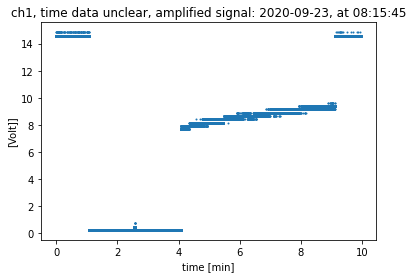

20200923_0815


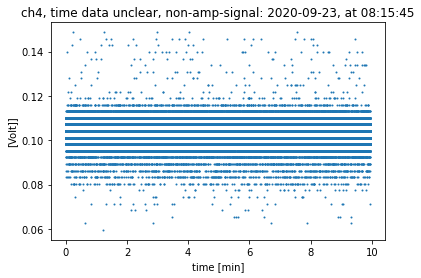

20200923_0815


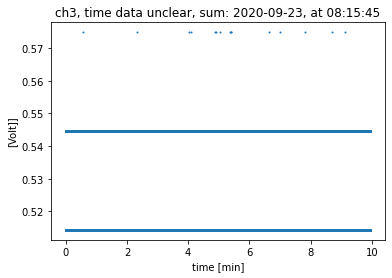

done


In [30]:
# 20200923_0815

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data__20200923_0815.pickle'
# list_of_files_yet_to_open.remove(file_name)
f = open(file_name,'rb')
scope_data = pickle.load(f)
# print(scope_data)
# print(len(scope_data))
start_time = scope_data[2]
ch1_data = []
ch1_time = []
ch4_data = []
ch4_time = []
ch3_data = []
ch3_time = []
print(start_time)
# with open(file_name, 'rb') as handle:
#         try:
#             while True:
#                 temp_array = pickle.load(handle)
#                 print(len(temp_array))
#         except EOFError:
#             pass

with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
                print(len(temp_array))
#                 print(temp_array[0])
                
                data_time = temp_array[2]
                time_diff = (data_time - start_time)/60
                new_ch1_data = temp_array[3]
                time_vec = temp_array[4]
                
                
                ch1_t = [t+time_diff for t in time_vec] #[(data_time+t-start_time)/60 for t in time_vec]
                ch1_data = ch1_data + new_ch1_data
                ch1_time = ch1_time + ch1_t
                
                new_ch3_data = temp_array[5]
                ch3_time_vec = temp_array[6]
                ch3_t = [t+time_diff for t in ch3_time_vec] #[data_time+t-start_time for t in ch3_time_vec]
                ch3_data = ch3_data + new_ch3_data
                ch3_time = ch3_time + ch3_t

                ch4_time_vec = temp_array[8]
                new_ch4_data = temp_array[7]
                ch4_t = [t+time_diff for t in ch4_time_vec] #[data_time+t-start_time for t in ch4_time_vec]
                ch4_data = ch4_data + new_ch4_data
                ch4_time = ch4_time + ch4_t

        except EOFError:
            pass
        
t = ch1_time
# t = [time/60 for time in ch1_time]
x = ch1_data
ch_num = "ch1, time data unclear"        
ch_name = "amplified signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)   
        
t = ch4_time
x = ch4_data
ch_num = "ch4, time data unclear"        
ch_name = "non-amp-signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  

t = ch3_time
x = ch3_data
ch_num = "ch3, time data unclear"        
ch_name = "sum"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  


round_done(repo_path)

11
1602074814.6728485
20201007_1546
11
11
20201007_1546


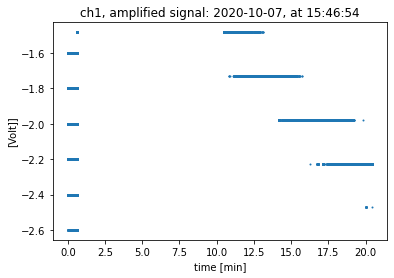

20201007_1546


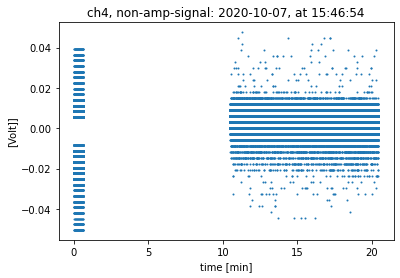

20201007_1546


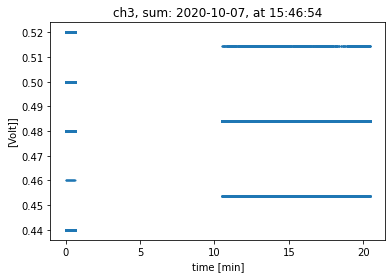

done


In [11]:
# 20201007_1546 

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data_20201007_1546.pickle'

f = open(file_name,'rb')
scope_data = pickle.load(f)
# print(scope_data)
print(len(scope_data))
start_time = scope_data[2]


ch1_data = []
ch1_time = []
ch4_data = []
ch4_time = []
ch3_data = []
ch3_time = []
print(start_time)
add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
print(add_the_time)

with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
                print(len(temp_array))
#                 print(temp_array[0])
                
                data_time = temp_array[2]
                time_diff = (data_time - start_time)/60
                new_ch1_data = temp_array[3]
                time_vec = temp_array[4]
                
                
                ch1_t =[t+time_diff for t in time_vec] # [(data_time+t-start_time)/60 for t in time_vec]
                ch1_data = ch1_data + new_ch1_data
                ch1_time = ch1_time + ch1_t
                
                new_ch3_data = temp_array[5]
                ch3_time_vec = temp_array[6]
                ch3_t =[t+time_diff for t in ch3_time_vec] # [data_time+t-start_time for t in ch3_time_vec]
                ch3_data = ch3_data + new_ch3_data
                ch3_time = ch3_time + ch3_t

                new_ch4_data = temp_array[7]
                ch4_time_vec = temp_array[8]
                ch4_t =[t+time_diff for t in ch4_time_vec] # [data_time+t-start_time for t in ch4_time_vec]
                ch4_data = ch4_data + new_ch4_data
                ch4_time = ch4_time + ch4_t

        except EOFError:
            pass

        
t = ch4_time[:len(ch1_data)]
x = ch1_data
ch_num = "ch1"        
ch_name = "amplified signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)   
        
t = ch4_time
x = ch4_data
ch_num = "ch4"        
ch_name = "non-amp-signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  

t = ch3_time
x = ch3_data
ch_num = "ch3"        
ch_name = "sum"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  

round_done(repo_path)

# Making the pickle opener into a function

In [12]:
file_name = 'data_20201007_1546.pickle'

def get_from_pickle_and_save(file_name,ch1_plot_title='ch1', ch3_plot_title='ch3',ch4_plot_title='ch4'):
    # get data

    f = open(file_name,'rb')
    scope_data = pickle.load(f)
    # print(scope_data)
    print(len(scope_data))
    start_time = scope_data[2]


    ch1_data = []
    ch1_time = []
    ch4_data = []
    ch4_time = []
    ch3_data = []
    ch3_time = []
    print(start_time)
    add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
    print(add_the_time)

    with open(file_name, 'rb') as handle:
            try:
                while True:
                    temp_array = pickle.load(handle)
                    print(len(temp_array))
    #                 print(temp_array[0])

                    data_time = temp_array[2]
                    time_diff = (data_time - start_time)/60
                    new_ch1_data = temp_array[3]
                    time_vec = temp_array[4]


                    ch1_t =[t+time_diff for t in time_vec] # [(data_time+t-start_time)/60 for t in time_vec]
                    ch1_data = ch1_data + new_ch1_data
                    ch1_time = ch1_time + ch1_t

                    new_ch3_data = temp_array[5]
                    ch3_time_vec = temp_array[6]
                    ch3_t =[t+time_diff for t in ch3_time_vec] # [data_time+t-start_time for t in ch3_time_vec]
                    ch3_data = ch3_data + new_ch3_data
                    ch3_time = ch3_time + ch3_t

                    new_ch4_data = temp_array[7]
                    ch4_time_vec = temp_array[8]
                    ch4_t =[t+time_diff for t in ch4_time_vec] # [data_time+t-start_time for t in ch4_time_vec]
                    ch4_data = ch4_data + new_ch4_data
                    ch4_time = ch4_time + ch4_t

            except EOFError:
                pass


    t = ch1_time
    x = ch1_data
    ch_num = ch1_plot_title
    ch_name = "amplified signal"
    plotting_saving_ch(t,x,start_time,ch_num,ch_name)   

    t = ch4_time
    x = ch4_data
    ch_num = ch4_plot_title        
    ch_name = "non-amp-signal"
    plotting_saving_ch(t,x,start_time,ch_num,ch_name)  

    t = ch3_time
    x = ch3_data
    ch_num = ch3_plot_title      
    ch_name = "sum"
    plotting_saving_ch(t,x,start_time,ch_num,ch_name)  
# ##################################################################################

9
20201011_1529
9
9
20201011_1529


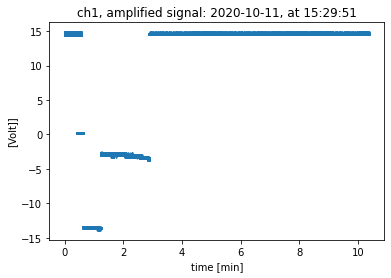

20201011_1529


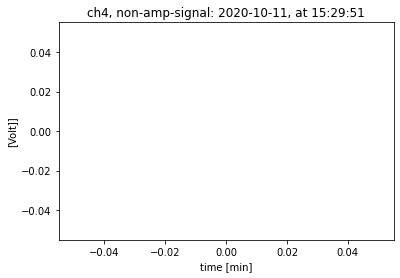

20201011_1529


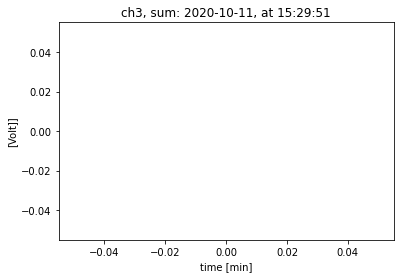

done


In [20]:
# 20201011_1529

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data_20201011_1524.pickle'
f = open(file_name,'rb')
scope_data = pickle.load(f)
# print(scope_data)
print(len(scope_data))
start_time = scope_data[2]


ch1_data = []
ch1_time = []
ch4_data = []
ch4_time = []
ch3_data = []
ch3_time = []

add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
print(add_the_time)

with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
                print(len(temp_array))
#                 print(temp_array[0])
                
                data_time = temp_array[2]
                time_diff = (data_time - start_time)/60
                new_ch1_data = temp_array[3]
                time_vec = temp_array[4]
                
                
                ch1_t =[t+time_diff for t in time_vec] # [(data_time+t-start_time)/60 for t in time_vec]
                ch1_data = ch1_data + new_ch1_data
                ch1_time = ch1_time + ch1_t
                
                new_ch3_data = temp_array[5]
                ch3_time_vec = temp_array[6]
                ch3_t =[t+time_diff for t in ch3_time_vec] # [data_time+t-start_time for t in ch3_time_vec]
                ch3_data = ch3_data + new_ch3_data
                ch3_time = ch3_time + ch3_t

                new_ch4_data = temp_array[7]
                ch4_time_vec = temp_array[8]
                ch4_t =[t+time_diff for t in ch4_time_vec] # [data_time+t-start_time for t in ch4_time_vec]
                ch4_data = ch4_data + new_ch4_data
                ch4_time = ch4_time + ch4_t

        except EOFError:
            pass

        
t = ch1_time
x = ch1_data
ch_num = "ch1"        
ch_name = "amplified signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)   
        
t = ch4_time
x = ch4_data
ch_num = "ch4"        
ch_name = "non-amp-signal"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  

t = ch3_time
x = ch3_data
ch_num = "ch3"        
ch_name = "sum"
plotting_saving_ch(t,x,start_time,ch_num,ch_name)  

round_done(repo_path)

9
1602419391.0646982
20201011_1529
9
9
20201011_1529


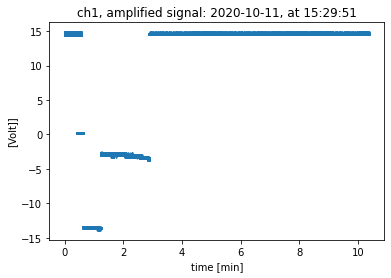

20201011_1529


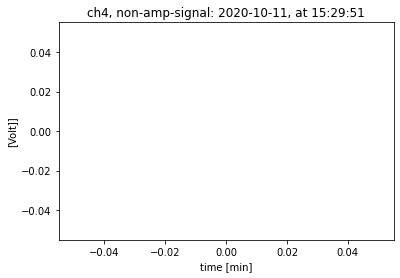

20201011_1529


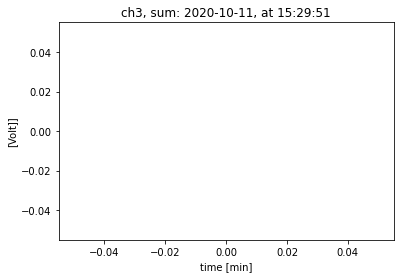

done


In [25]:
# 20201011_1529

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

file_name = 'data_20201011_1524.pickle'

get_from_pickle_and_save(file_name)

round_done(repo_path)

9
1602419609.5591671
20201011_1533
9
9
20201011_1533


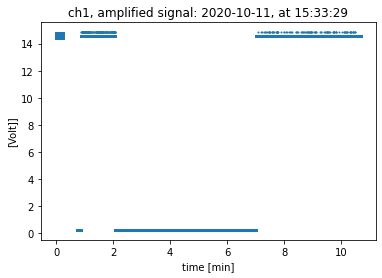

20201011_1533


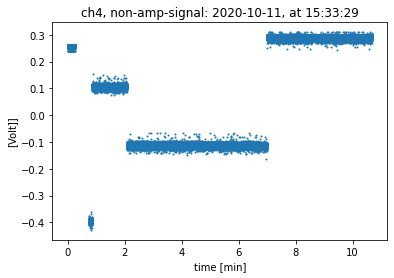

20201011_1533


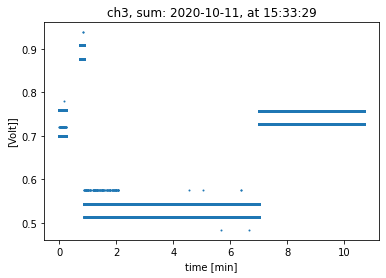

done


In [30]:
# 20201011_1533

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

file_name = 'data_20201011_1533.pickle'

get_from_pickle_and_save(file_name)

round_done(repo_path)

9
1602420504.2244434
20201011_1548
9
20201011_1548


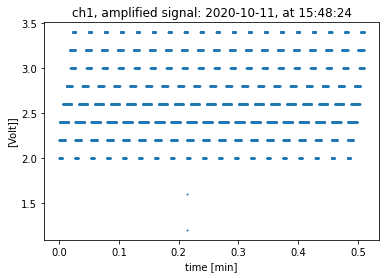

20201011_1548


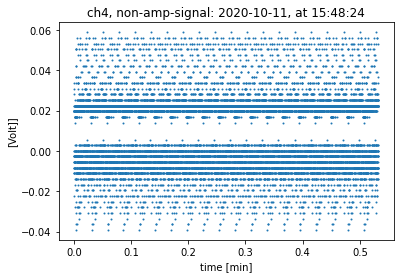

20201011_1548


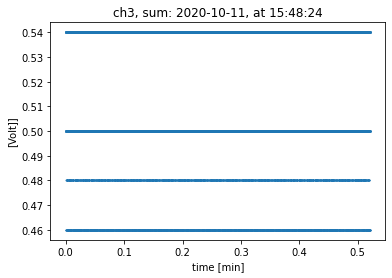

done


In [31]:
# 20201011_1548

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

file_name = 'data_20201011_1547.pickle'

get_from_pickle_and_save(file_name)

round_done(repo_path)

9
1602494532.9769356
20201012_1222
9
9
20201012_1222


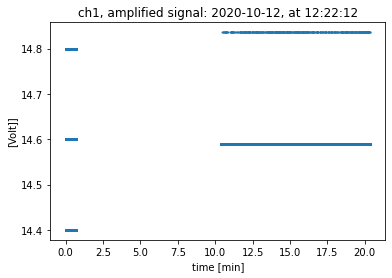

20201012_1222


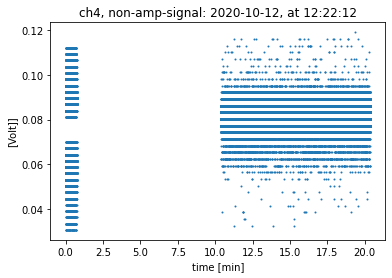

20201012_1222


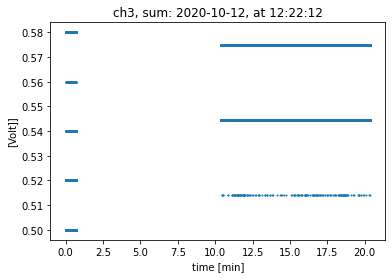

done


In [33]:
# 20201012_1222

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

file_name = "data_20201012_1222.pickle"

get_from_pickle_and_save(file_name)

round_done(repo_path)

20201012_1346
9
9
9
9
9
9
20201012_1346


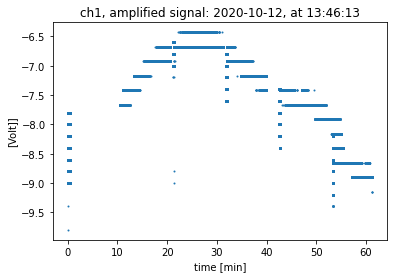

20201012_1346


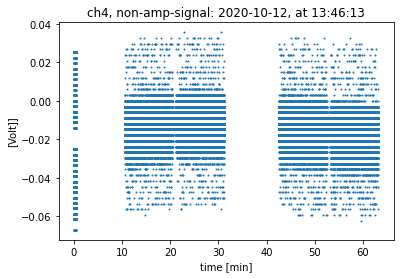

20201012_1346


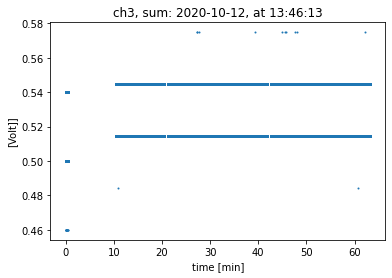

done


In [44]:
# 20201012_1346

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

file_name = 'data_20201012_1346.pickle'

get_from_pickle_and_save(file_name)

round_done(repo_path)

20201012_1508
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
20201012_1508


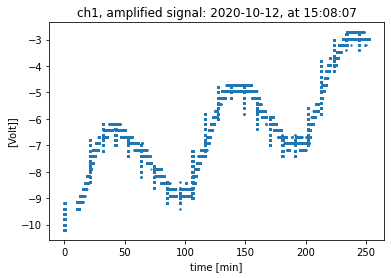

20201012_1508


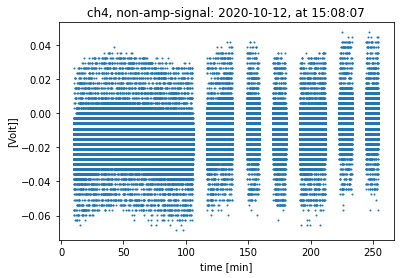

20201012_1508


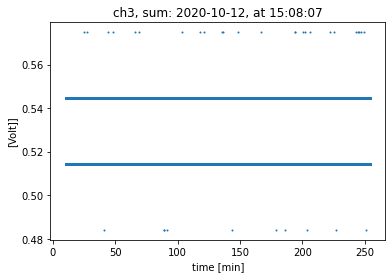

done


In [63]:
# 20201012_1508

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

file_name = "data_20201012_1507.pickle"

get_from_pickle_and_save(file_name)
round_done(repo_path)

20201012_2334
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
20201012_2334


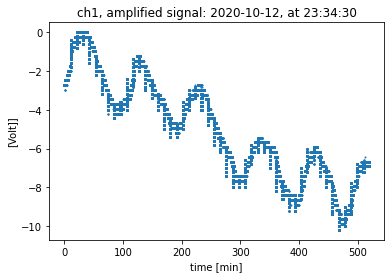

20201012_2334


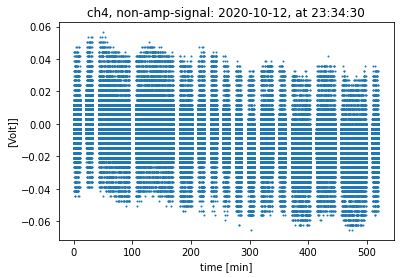

20201012_2334


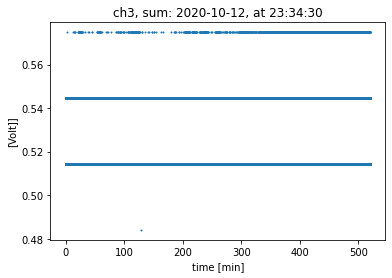

done


In [66]:
# 

# 'data_20201012_2333.pickle'

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

file_name = 'data_20201012_2333.pickle'

get_from_pickle_and_save(file_name)
round_done(repo_path)

# extra stuff

In [62]:
# progress:
list_of_files_yet_to_open = saved_files.copy()
file_names = ['data_20201012_2333.pickle',"data_20201012_1507.pickle","data_20201012_1346.pickle",'data_20201012_1222.pickle','data_20201011_1547.pickle','data_20201011_1533.pickle','data_20201011_1524.pickle','data_20201007_1546.pickle','data__20200923_0815.pickle','data__20200921_1228.pickle','data__20200917_1855.pickle','data__20200917_1811.pickle','data__20200917_1716.pickle','data__20200917_1529.pickle','data__20200917_1458.pickle','data__20200917_1418.pickle','data__20200916_1754.pickle','data_dump_090920n1914.pickle','data_20200924_1510.pickle','data_20200923_0905.pickle','data_200916__1248.pickle','data_200915__2300.pickle','data_200913n1600.pickle','data_140920n1818.pickle','data_200915__1140.pickle','data__20200916_1827_Copy.pickle','data__20200916_1827 - Copy.pickle','data__20200916_1827.pickle','data_130920n1219.pickle','data_200915__1700.pickle']
demo_files = ['demo_3min_data__20200916_1812.pickle', 'demo_3min_data__20200916_1819.pickle', 'demo_run_0931.pickle', 'demo_run_20200916_1419.pickle', 'demo_run_20200916_1422.pickle']

def check_off(file_names):
    list_of_files_yet_to_open = saved_files.copy()
    for file_name in file_names:
        list_of_files_yet_to_open.remove(file_name)
    print(len(list_of_files_yet_to_open))
#     print(list_of_files_yet_to_open)
    return list_of_files_yet_to_open

list_of_files_yet_to_open = check_off(demo_files)
check_off(file_names+demo_files)


31
2


['data_20201012_2333.pickle', 'desktop.ini']

In [56]:
new_list = check_off(file_names+demo_files)
print(new_list[0])

1
desktop.ini


In [ ]:
print(scope_data[1])

print(len(scope_data[3]),len(scope_data[4]),len(scope_data[6]))
print("\n")

# print(scope_data[2][1:10])

print('ch1_data',len(scope_data[3]))
print('ch1_time',len(scope_data[4]))

# print('\nch3_data',len(scope_data[5])," - ",scope_data[5][1:10])
# print('ch3_time',len(scope_data[6])," - ",scope_data[6][1:10])
# print('\nch4_data',len(scope_data[7])," - ",scope_data[7][1:10])
# print('ch4_time',len(scope_data[8])," - ",scope_data[8][1:10])
# print('\nch1_data',scope_data[9][1:10])
# # print('ch1_time',scope_data[10][1:10])

In [ ]:
print(len(ch1_data))
print(len(ch1_time))
print(("\n"))
print(len(ch3_data))
print(len(ch3_time))
print(("\n"))
print(len(ch4_data))
print(len(ch4_time))
print(("\n"))
ch1_data = []
ch4_data = []
ch1_time = []
ch4_time = []
ch3_data = []
ch3_time = []

In [ ]:
#

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data_.pickle'
# list_of_files_yet_to_open.remove(file_name)
f = open(file_name,'rb')
scope_data = pickle.load(f)
# print(scope_data)
# print(len(scope_data))
start_time = scope_data[2]

# add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
# print(add_the_time)


with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
                print(len(temp_array))
        except EOFError:
            pass

        
add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
print(add_the_time)

round_done(repo_path)

In [ ]:
# print( os.getcwd())

In [9]:
list_of_files_yet_to_open = saved_files.copy()

In [10]:
list_of_files_yet_to_open

[]